### Import necessary packages

In [1]:
from fastai.vision.all import *
import torch
import cv2
import matplotlib.pyplot as plt
import tifffile as tiff

# Checking the device compatibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # to select device as cpu only put this torch.device('cpu') 
print('Using device:', device)
#print(torch.cuda.get_device_name(0))
#print(torch.__version__)

Using device: cuda


### Define custom functions

In [2]:
def get_y(filename):
    return (path_labels / Path(filename.stem + filename.suffix ))
#Calculate the proportion of correct predictions
def original_ac(predictions, target):
    pred_hot1_decoded = predictions.argmax(dim=1)
    correct_predictions = ( TensorBase(pred_hot1_decoded) == TensorBase(target) )
    correct_predictions = correct_predictions.float()
    return correct_predictions.mean()

#Number of correctly determined porus pixels divided by number of all porus pixels
def porus_ac(predictions, target):   
    pred_hot1_decoded = predictions.argmax(dim=1)
    porosity_in_target = target == 1
    correct_porosity = torch.logical_and( TensorBase(porosity_in_target), TensorBase(pred_hot1_decoded) )
    correct_porosity = correct_porosity.float()       
    return correct_porosity.sum() / porosity_in_target.float().sum()

metrics = [porus_ac, original_ac]
class AddNoise(RandTransform):
    def __init__(self, mean=0., std=1., **kwargs):
        self.std = std
        self.mean = mean
        super().__init__(**kwargs)
    def encodes(self, x:TensorImage):
        return x + torch.randn(x.size(),device=x.device) * self.std + self.mean

### Loading the pre trained model

In [3]:
learner = load_learner('/home/susa03/post_project/unet_fastai/model_bse.pkl')

### Load test data and Prediction and visualization

(-0.5, 661.5, 386.5, -0.5)

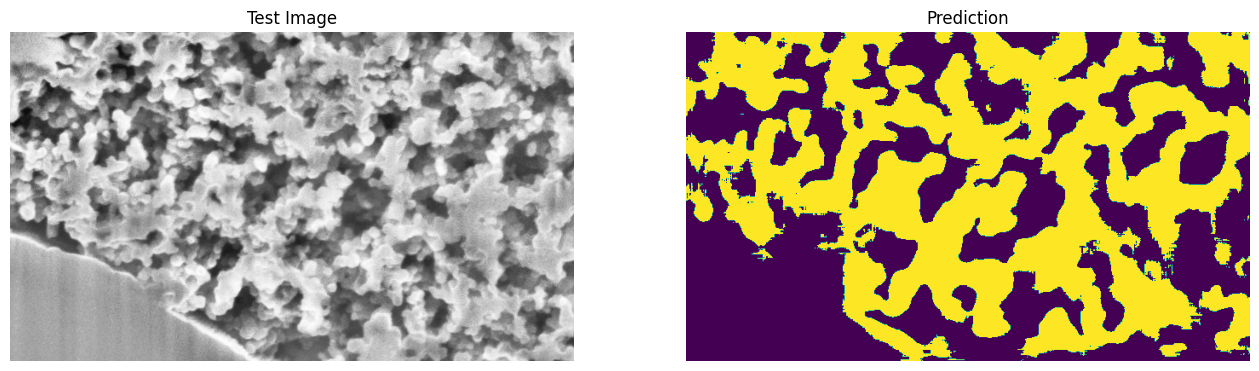

In [4]:
# Path to your test image
image_path = Path('/home/susa03/post_project/post_dataset/test_data/2011-Oct-Porous-carbon-Opel2-Torben-Prill-GV_and_Segmented/GV/Gray_Value089.tif')
pred_class, pred_idx, pred_probs = learner.predict(image_path)
figure = plt.figure( figsize=(16,8))

ax1,ax2 = figure.subplots(1,2)
image_path = '/home/susa03/post_project/post_dataset/test_data/2011-Oct-Porous-carbon-Opel2-Torben-Prill-GV_and_Segmented/GV/Gray_Value089.tif'
image = cv2.imread(image_path)  

ax1.imshow(image)
ax1.set_title('Test Image')
ax1.axis('off')
    
ax2.imshow(pred_class)  
ax2.set_title('Prediction')
ax2.axis('off')

(-0.5, 954.5, 774.5, -0.5)

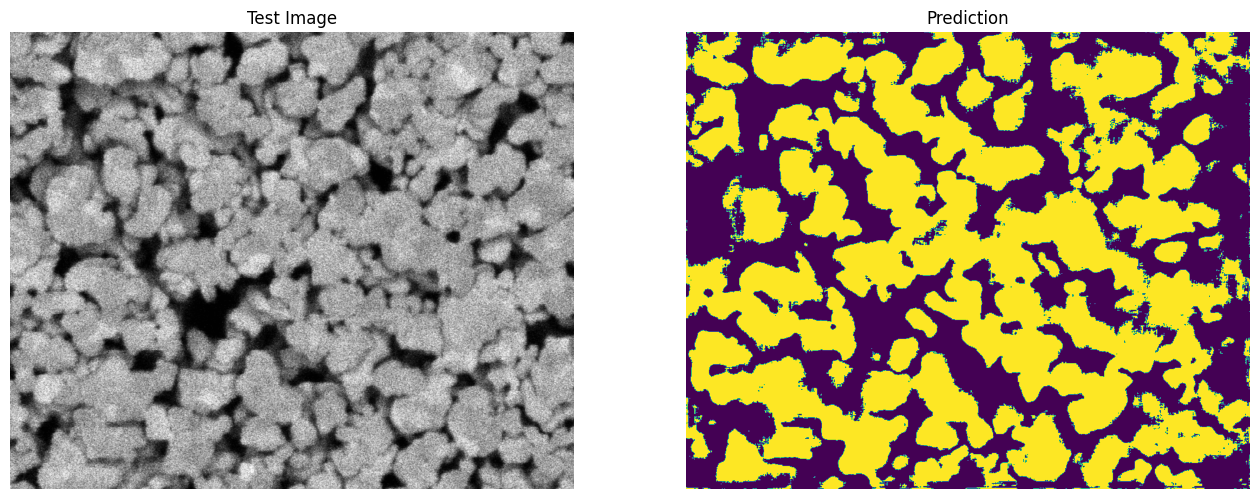

In [5]:
# Path to your test image
image_path = Path('/home/susa03/post_project/post_dataset/test_data/ZrO2-P01-from-Repos/esb-corrected-3x3x3-toolip/zirconiumP01_146.png')

pred_class, pred_idx, pred_probs = learner.predict(image_path)
figure = plt.figure( figsize=(16,8))

ax1,ax2 = figure.subplots(1,2)
image_path = '/home/susa03/post_project/post_dataset/test_data/ZrO2-P01-from-Repos/esb-corrected-3x3x3-toolip/zirconiumP01_146.png'
image = cv2.imread(image_path)  
ax1.imshow(image)
ax1.set_title('Test Image')
ax1.axis('off')
    
ax2.imshow(pred_class)  
ax2.set_title('Prediction')
ax2.axis('off')

### Predict the mask for the synthetic data use BSE channel and store them under "path/prediction/bse" folder

In [ ]:
path = Path('/home/susa03/post_project/post_dataset/synthetic_data/sorted_data/')
path_images = path/'bse'
file_names = get_image_files(path_images)
prediction_path = path/'prediction'/'bse'
for file in file_names:
    _, prediction, _ = learner.predict(file)
    store_path = prediction_path/Path(file.stem + file.suffix) 
    tiff.imwrite(store_path,np.array(prediction,dtype=np.uint8))

### Evaluate the network on real datasets and store them under test dataset/results/bse

#### Dataset1

In [ ]:
#Path to your test image
test_path = Path('/home/susa03/post_project/post_dataset/test_data/ZrO2-P01-from-Repos/')
test_image_path = test_path/'esb-corrected-3x3x3-toolip/'
prediction_path = test_path/'results'/'bse'
test_images = get_image_files(test_image_path)

for test in test_images:
    _, prediction, _ = learner.predict(test)
    store_path = prediction_path/Path(test.stem + test.suffix) 
    tiff.imwrite(store_path,np.array(prediction,dtype=np.uint8))

#### Dataset2

In [ ]:
test_path = Path('/home/susa03/post_project/post_dataset/test_data/2011-Oct-Porous-carbon-Opel2-Torben-Prill-GV_and_Segmented/')
test_image_path = test_path/'GV'
prediction_path = test_path/'results'/'bse'
test_images = get_image_files(test_image_path)

for test in test_images:
    _, prediction, _ = learner.predict(test)
    store_path = prediction_path/Path(test.stem + test.suffix) 
    tiff.imwrite(store_path,np.array(prediction,dtype=np.uint8))